## STEP A: Data Cleaning Steps

### Importing Required Libraries

In [96]:
import pandas as pd

#NLTK (Natural Language Toolkit for normalizing text

import re
import os
import nltk
nltk.download('punkt')


from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import f1_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk import pos_tag, word_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ICT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
#Download necessary NLTK resources (only run once)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [Errno 11001] getaddrinfo failed>
[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

# Step 1: Removing Duplicates

- Load your dataset.
- Explore the first few rounds using .head()
- Remove duplicate rows based on the tweet text column.
- Save the cleaned dataset.

### Loading dataset (Use "r" before the string to handle Windows file paths)

In [3]:
data = pd.read_csv('election_dataset.csv', low_memory=False)

### Explore the first few rounds using .head()

In [4]:
print(data.head())

                         Source Language  Number of Likes  Number of Retweets  \
0  Tweets from General hashtags       en                0                   0   
1  Tweets from General hashtags       en                3                   0   
2  Tweets from General hashtags       en                0                   0   
3  Tweets from General hashtags       en                1                   0   
4  Tweets from General hashtags       en                0                   0   

   Author Following Count  Author Listed Count  Author Verified  \
0                      58                    0            False   
1                     386                    1            False   
2                      97                    0            False   
3                     512                    0            False   
4                     931                    1            False   

  Author Tweets Count (2) Author Followers Count (2)  \
0                    3546                         36  

###  Check for duplicates

In [5]:
print("Number of duplicate tweets before removal:", data.duplicated(subset=['Tweets']).sum())

Number of duplicate tweets before removal: 52065


### Remove duplicates based on the tweet text column

In [6]:
data = data.drop_duplicates(subset=['Tweets'], keep='first')

### Save cleaned dataset

In [7]:
cleaned_file_path = "cleaned_election_dataset.csv"
data.to_csv(cleaned_file_path, index=False)

### Check duplicates after removal

In [8]:
print("Number of duplicate tweets after removal:", data.duplicated(subset=['Tweets']).sum())

print("Duplicates removed successfully! Cleaned dataset saved as:", cleaned_file_path)

Number of duplicate tweets after removal: 0
Duplicates removed successfully! Cleaned dataset saved as: cleaned_election_dataset.csv



# STEP B: Dropping Unnecessary Columns.

**We will :**

- List all column names to identify what to keep or remove.
- Drop irrelevant columns (e.g., metadata like source, etc.).
- Keep only necessary columns for sentiment analysis (e.g., tweets, language).

In [9]:
print(data.columns)

Index(['Source', 'Language', 'Number of Likes', 'Number of Retweets',
       'Author Following Count', 'Author Listed Count', 'Author Verified',
       'Author Tweets Count (2)', 'Author Followers Count (2)', 'Tweets'],
      dtype='object')


---

### **Column Selection for Sentiment Analysis**

| **Column Name**                 | **Keep?** | **Reason** |
|----------------------------------|----------|-----------|
| ✅ `Tweets`                     | ✅ Yes  | Main text for sentiment analysis. |
| ✅ `Language`                   | ✅ Yes | Useful because we are filtering only English tweets. |
| ✅ `Number of Likes`            | ✅ Yes | Helps analyze sentiment vs. engagement. |
| ✅ `Number of Retweets`         | ✅ Yes | Shows how sentiment spreads. |
| ❌ `Source`                     | ❌ No | Not relevant. |
| ❌ `Author Following Count`     | ❌ No | User metadata, not needed. |
| ❌ `Author Listed Count`        | ❌ No | Not relevant. |
| ❌ `Author Verified`            | ❌ No | Not needed. |
| ❌ `Author Tweets Count (2)`    | ❌ No | Not relevant. |
| ❌ `Author Followers Count (2)` | ❌ No | Not needed. |

---
✅ **Keeping `Number of Likes` & `Number of Retweets`** to analyze sentiment vs. popularity.  
❌ **Dropping metadata** (user verification, following count, etc.) since they don’t impact sentiment analyis


### Droping only the unnecessary columns

In [10]:
data = data.drop(columns=['Source', 'Author Following Count', 'Author Listed Count', 
                      'Author Verified', 'Author Tweets Count (2)', 
                      'Author Followers Count (2)'], errors='ignore')

### Show remaining columns

In [11]:
print("Remaining columns:", data.columns)

Remaining columns: Index(['Language', 'Number of Likes', 'Number of Retweets', 'Tweets'], dtype='object')


### Save cleaned dataset

In [12]:
cleaned_file_path = r"C:\Users\ICT\Desktop\300lvl 2nd SEM\Machine Learning\Progress\cleaned_election_dataset.csv"
data.to_csv(cleaned_file_path, index=False)

print("Dataset cleaned!")


Dataset cleaned!


# Step D: Handling Missing Values

### Check for missing values in each column

In [13]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 420213 entries, 0 to 472275
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Language            420213 non-null  object
 1   Number of Likes     420213 non-null  int64 
 2   Number of Retweets  420213 non-null  int64 
 3   Tweets              420212 non-null  object
dtypes: int64(2), object(2)
memory usage: 16.0+ MB
None


In [14]:
print("Missing values per column:\n", data.isnull().sum())

Missing values per column:
 Language              0
Number of Likes       0
Number of Retweets    0
Tweets                1
dtype: int64


*One value is ound missing under the Tweets colum and none from other columns.*

### Remove rows (observations) where 'Tweets' column is missing (NaN)

In [15]:
data = data.dropna(subset=['Tweets'])

### Confirm missing values after removal

In [16]:
print("Missing values after removing empty tweets:\n", 
      data.isnull().sum())

Missing values after removing empty tweets:
 Language              0
Number of Likes       0
Number of Retweets    0
Tweets                0
dtype: int64


*Ater dropping the rows with missing tweets, we everified that teher are no missing values as all values are : 0*

# Handle Missing Values in Other Columns
Now, we decide what to do with missing values in Likes, Retweets, or Language:

- Option 1 (Recommended): Fill missing values with 0 for Likes & Retweets.

- Option 2: Drop rows if they have missing Likes or Retweets (not recommended unless too many are missing).

Fill Missing Likes & Retweets with 0 (Best Choice)

` df['Number of Likes'] = df['Number of Likes'].fillna(0)` to replace missing values in likes with 0

` df['Number of Retweets'] = df['Number of Retweets'].fillna(0)` to replace missing values in retweets with 0 

### Save Cleaned Data

In [17]:
cleaned_file_path = r"C:\Users\ICT\Desktop\300lvl 2nd SEM\Machine Learning\Progress\cleaned_election_dataset.csv"
data.to_csv(cleaned_file_path, index=False)

print("Missing values handled! Cleaned dataset saved.")

Missing values handled! Cleaned dataset saved.


### Drop Non-English Tweets

##### Keep only rows where 'Language' is 'en' (English)


In [18]:
data = data[data['Language'] == 'en']

##### Confirm that only English tweets remain

In [19]:
print("Unique languages after filtering:", data['Language'].unique())
print("Non-English tweets removed! Remaining dataset size:", data.shape)

Unique languages after filtering: ['en']
Non-English tweets removed! Remaining dataset size: (404188, 4)


### Save Cleaned Data

In [20]:
cleaned_file_path = r"C:\Users\ICT\Desktop\300lvl 2nd SEM\Machine Learning\Progress\cleaned_election_dataset.csv"
data.to_csv(cleaned_file_path, index=False)

print("✅ Dataset cleaned and saved with only English tweets!")

✅ Dataset cleaned and saved with only English tweets!


# STEP E: Normalize Text (Cleaning Tweets)
- Convert text to lowercase (e.g., "Election Results are OUT" → "election results are out")
- Remove special characters, URLs, hashtags, and mentions (e.g., "Check this out! #election2023 @user https://link.com" → "check this out election2023")
- Remove stopwords (common words like “the,” “is,” “and” that don’t add meaning).
- Apply lemmatization (reducing words to their base form, e.g., "running" → "run" and "votes" → "vote").

### Initialize lemmatizer and stopwords

In [21]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

### Function to clean tweets

In [22]:
def clean_tweet(text):
    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)

    # Remove mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)

    # Remove special characters, numbers, and extra spaces
    text = re.sub(r'[^a-z\s]', '', text)

    # Tokenize words
    words = word_tokenize(text)

    # Remove stopwords and apply lemmatization
    cleaned_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]

    # Join words back into a sentence
    return ' '.join(cleaned_words)

### Apply cleaning function to the 'Tweets' column

In [23]:
data['Cleaned_Tweets'] = data['Tweets'].apply(clean_tweet)

#### Show sample cleaned tweets

In [24]:
print(data[['Tweets', 'Cleaned_Tweets']].head())

                                              Tweets  \
0                                               TRUE   
1  zoom in and see the title of the compendium ti...   
2  zombie no go go unless you tell am to go\nzomb...   
3                   zlatan lagos anthem\n\n live via   
4                   zinoleesky rocking \n\n live via   

                                      Cleaned_Tweets  
0                                               true  
1  zoom see title compendium tinubu given yesterd...  
2  zombie go go unless tell go zombie go think un...  
3                       zlatan lagos anthem live via  
4                        zinoleesky rocking live via  


#### Dropping intitail "Tweet" column

In [25]:
data = data.drop(columns=['Tweets'])

#### Dropping intitail "Tweet" column

Ensure 'Cleaned_Tweets' is treated as a string and handle NaN values

In [26]:
data['Cleaned_Tweets'] = data['Cleaned_Tweets'].fillna('').astype(str)

#### Save cleaned dataset

In [27]:
cleaned_file_path = r"C:\Users\ICT\Desktop\300lvl 2nd SEM\Machine Learning\Progress\normalized_election_dataset.csv"
data.to_csv(cleaned_file_path, index=False)

print("✅ Text normalization completed! Cleaned dataset saved.")

✅ Text normalization completed! Cleaned dataset saved.


# STEP F: Feature Engineering and Selection


### Step I: Engineer meaningful features

Since we have already preprocessed and normalized our tweet data, we can extract new, potentially useful features. Here are a few common feature engineering ideas for text-based sentiment/election prediction tasks based on research:

#### Potential New Features:
 `Tweet Length` – Number of characters or words.

 `Word Count` – Total number of words.

 `Sentiment Score` – Using tools like TextBlob or VADER.

 `Lexical Diversity` – Unique words / total words.

 `Part-of-Speech Ratios` – Ratio of nouns, verbs, adjectives.

 `Keyword Flags` – Presence of political keywords (e.g., "tinubu", "atiku", "obi").

# Adding Engineered Features

 Convert all non-string (e.g., NaN) values to empty string before applying tokenizer

In [28]:
data['tokens'] = data['Cleaned_Tweets'].fillna('').astype(str).apply(word_tokenize)

#### Loading Data

In [29]:
data = pd.read_csv('normalized_election_dataset.csv')

#### Word tokens for each tweet

##### 1. Tweet Length (in characters)

In [30]:
data['tweet_length'] = data['Cleaned_Tweets'].apply(lambda x: len(str(x)))

##### 2. Word Count

In [31]:
data['word_count'] = data['Cleaned_Tweets'].apply(lambda x: len(str(x).split()))

##### 3. Sentiment Score (VADER (good for social media))

In [32]:
sia = SentimentIntensityAnalyzer()

def vader_sentiment(text):
    if pd.isna(text):
        return 0
    return sia.polarity_scores(text)['compound']

data['vader_sentiment'] = data['Cleaned_Tweets'].apply(vader_sentiment)

##### 4. Lexical Diversity

In [33]:
def lexical_diversity(text):
    words = str(text).split()
    return len(set(words)) / len(words) if len(words) > 0 else 0

data['lexical_diversity'] = data['Cleaned_Tweets'].apply(lexical_diversity)

##### 5. Part-of-Speech Ratios

In [34]:
def pos_ratios(text):
    try:
        tokens = nltk.word_tokenize(str(text))
        tags = nltk.pos_tag(tokens)
        total = len(tags)
        if total == 0:
            return pd.Series([0, 0, 0])
        noun_ratio = len([t for t in tags if t[1].startswith('NN')]) / total
        verb_ratio = len([t for t in tags if t[1].startswith('VB')]) / total
        adj_ratio = len([t for t in tags if t[1].startswith('JJ')]) / total
        return pd.Series([noun_ratio, verb_ratio, adj_ratio])
    except:
        return pd.Series([0, 0, 0])

data[['noun_ratio', 'verb_ratio', 'adj_ratio']] = data['Cleaned_Tweets'].apply(pos_ratios)

##### 6. Keyword Flags

In [35]:
keywords = [
    'tinubu', 'apc',
    'atiku', 'pdp',
    'obi', 'lp', 'labour party',
    'kwankwaso', 'nnpp'
]

for kw in keywords:
    data[f'contains_{kw}'] = data['Cleaned_Tweets'].apply(lambda x: int(kw in str(x).lower()))

In [36]:
print(data.head())

  Language  Number of Likes  Number of Retweets  \
0       en                0                   0   
1       en                3                   0   
2       en                0                   0   
3       en                1                   0   
4       en                0                   0   

                                      Cleaned_Tweets  tweet_length  \
0                                               true             4   
1  zoom see title compendium tinubu given yesterd...           134   
2  zombie go go unless tell go zombie go think un...           101   
3                       zlatan lagos anthem live via            28   
4                        zinoleesky rocking live via            27   

   word_count  vader_sentiment  lexical_diversity  noun_ratio  verb_ratio  \
0           1           0.4215               1.00    0.000000    0.000000   
1          20          -0.2023               0.95    0.450000    0.200000   
2          18           0.0000           

## Step II: Select the most relevant features

# Why it's PCA-Ready:
You already have a wide range of numeric features, including:

`Number of Likes, Number of Retweets`

`tweet_length, word_count`

`sentiment_score, vader_sentiment`

`lexical_diversity, noun_ratio, verb_ratio, adj_ratio`

`Binary keyword flags like contains_tinubu, contains_apc, etc.`

These are all numerical or binary, which PCA can handle (after scaling).


# What to exclude before PCA:
- Text columns like Cleaned_Tweets – PCA doesn’t work on raw text.

- Language – a categorical/text column.

- Any non-numeric metadata.

### 1. Selecting the relevant columns (numerical & binary features)

In [37]:
features = [
    'Number of Likes', 'Number of Retweets', 'tweet_length', 'word_count', 
    'vader_sentiment', 'lexical_diversity', 'noun_ratio', 
    'verb_ratio', 'adj_ratio', 'contains_tinubu', 'contains_apc', 'contains_atiku',
    'contains_obi', 'contains_lp', 'contains_labour party', 'contains_kwankwaso', 
    'contains_nnpp'
]

In [38]:
X = data[features]

### 2. Standardize the features

In [39]:
scaler = StandardScaler()

In [40]:
X_scaled = scaler.fit_transform(X)

### 3. Apply PCA to explore explained variance

In [41]:
pca = PCA()

In [42]:
X_pca = pca.fit_transform(X_scaled)

### 4. Plotting the explained variance to see how much each component explains

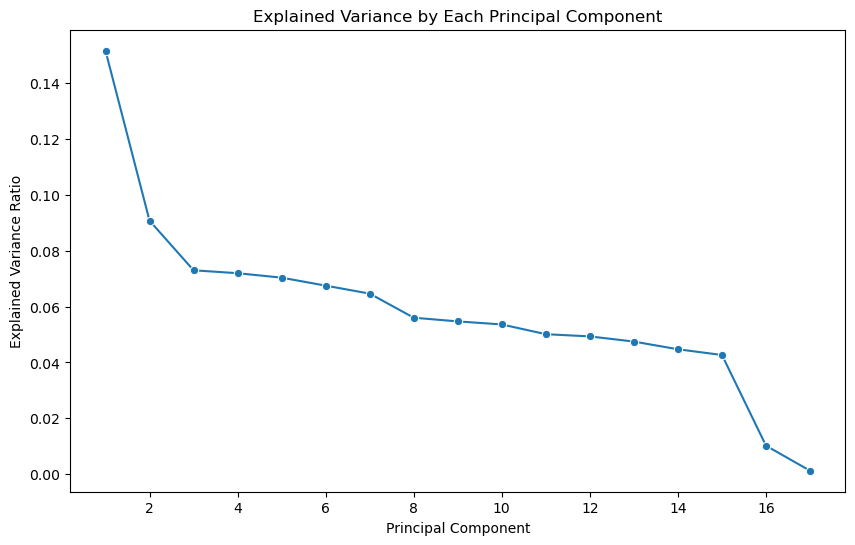

In [43]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(1, len(pca.explained_variance_ratio_)+1), y=pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance by Each Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

### 5. Reduce dimensionality to 2 or 3 components (for modeling or visualization)

In [44]:
pca_2d = PCA(n_components=2)

In [45]:
X_pca_2d = pca_2d.fit_transform(X_scaled)

In [46]:
pca_3d = PCA(n_components=3)

In [47]:
X_pca_3d = pca_3d.fit_transform(X_scaled)

### Plotting a 2D PCA

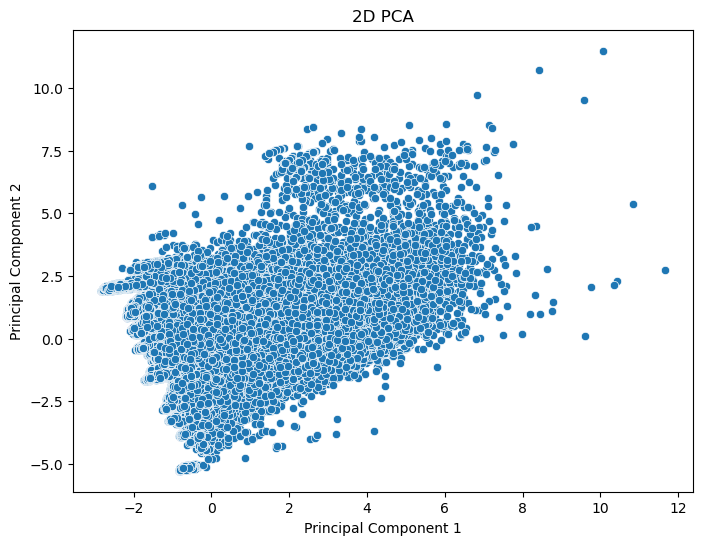

In [48]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca_2d[:, 0], y=X_pca_2d[:, 1])
plt.title('2D PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [49]:
###  Plotting PCA in 3D:

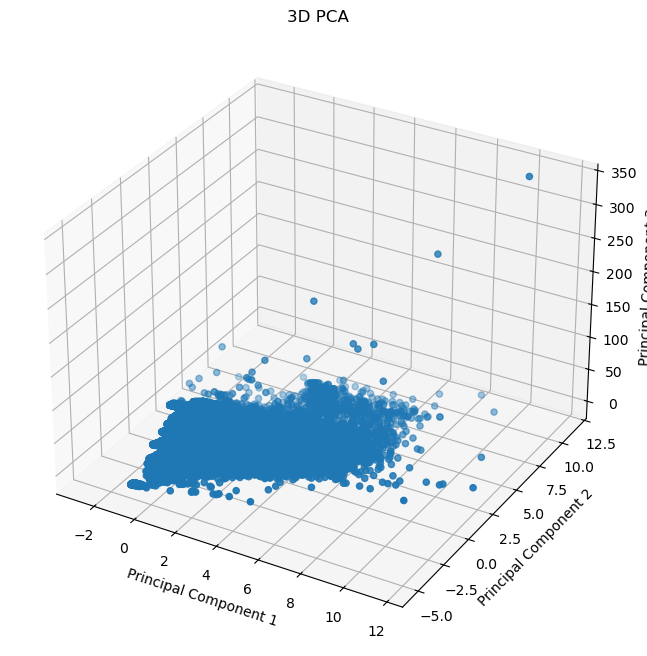

In [50]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2])
ax.set_title('3D PCA')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

# STEP G: DATA LABELLING: VADER Sentiment Intensity Analyzer
Trainning a simple Python rule-based classifier using VADER Sentiment Intensity Analyzer to classify each tweet as:
>positive

>negative

>neutral

### Downloading VADER

In [51]:
nltk.download('vader_lexicon')

[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

### Load dataset

In [52]:
data = pd.read_csv('tweets_to_label.csv')

### Initialize sentiment analyzer

In [53]:
sid = SentimentIntensityAnalyzer()

### Function to assign sentiment based on VADER compound score

In [54]:
def get_sentiment(text):
    if pd.isna(text) or text.strip() == '':
        return 'neutral'
    score = sid.polarity_scores(text)['compound']
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

### Apply sentiment analysis to Cleaned_Tweets

In [55]:
data['sentiment_label'] = data['Cleaned_Tweets'].apply(get_sentiment)

### Save labeled dataset

In [56]:
data.to_csv('labeled_sentiment_dataset.csv', index=False)
print("Sentiment labeling complete! Saved to labeled_sentiment_dataset.csv ✅")

Sentiment labeling complete! Saved to labeled_sentiment_dataset.csv ✅


### Previewing data heads

In [57]:
print(data.head())

  Language  Number of Likes  Number of Retweets  \
0       en                0                   0   
1       en                3                   0   
2       en                0                   0   
3       en                1                   0   
4       en                0                   0   

                                      Cleaned_Tweets  tweet_length  \
0                                               TRUE             4   
1  zoom see title compendium tinubu given yesterd...           134   
2  zombie go go unless tell go zombie go think un...           101   
3                       zlatan lagos anthem live via            28   
4                        zinoleesky rocking live via            27   

   word_count  vader_sentiment  lexical_diversity  noun_ratio  verb_ratio  \
0           1           0.4215               1.00    0.000000    0.000000   
1          20          -0.2023               0.95    0.450000    0.200000   
2          18           0.0000           

# STEP H: Model Development

### 1. Data Preparation (Preprocessing)
Before training models:
- Drop unused or irrelevant columns if needed
- Handle missing values (if any).
- Encode categorical labels (e.g., convert sentiment_label to numbers: positive = 1, negative = -1, neutral = 0).


### Load your dataset

In [58]:
data = pd.read_csv('labeled_sentiment_dataset.csv')

### Dropping rows with missing sentiment_label or Cleaned_Tweets if any

In [59]:
data.dropna(subset=['Cleaned_Tweets', 'sentiment_label'], inplace=True)

### Encode sentiment_label (categorical to numeric)

In [60]:
label_mapping = {
    'positive': 1,
    'neutral': 0,
    'negative': -1
}
data['sentiment_label_encoded'] = data['sentiment_label'].map(label_mapping)

`positive':` 1,
    `'neutral':` 0,
    `'negative':` -1

### Features and target separation

In [61]:
X = data['Cleaned_Tweets']
y = data['sentiment_label_encoded']

### Show the shape and head of X and y##

In [62]:
print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("Sample data:\n", pd.concat([X.head(), y.head()], axis=1))

Features shape: (403543,)
Target shape: (403543,)
Sample data:
                                       Cleaned_Tweets  sentiment_label_encoded
0                                               TRUE                        1
1  zoom see title compendium tinubu given yesterd...                       -1
2  zombie go go unless tell go zombie go think un...                        0
3                       zlatan lagos anthem live via                        0
4                        zinoleesky rocking live via                        0


### Splitting data into features (X) and target (y).
Split data into trainning(x) and test(y) sets (80% train, 20% test)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [64]:
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (322834,)
Testing data shape: (80709,)


`test_size=0.2` means 20% of the data goes to testing, 80% for training.

`stratify=y` ensures that the distribution of sentiment labels is preserved in both training and testing sets.

`random_state=42` makes sure the split is reproducible.

In [65]:
print(X_train.head())

300490                           needed vote capacity jonze
38750     idea difficult would peter without men side no...
125114    happy birthday great leader wishing many healt...
109173      eye judiciary eye judiciary eye judiciary focus
363519                                            wan leave
Name: Cleaned_Tweets, dtype: object


### Initialize vectorizer

In [66]:
tfidf = TfidfVectorizer(max_features=5000) 

`max_features`=5000 means:
- Keep only the top 5,000 most important words (based on frequency).
- Ignore rare words or ones that don’t add much value.

### Fit and transform training data, transform test data

In [67]:
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [68]:
print("TF-IDF training data shape:", X_train_tfidf.shape)
print("TF-IDF test data shape:", X_test_tfidf.shape)

TF-IDF training data shape: (322834, 5000)
TF-IDF test data shape: (80709, 5000)


# STEP G: Model Development
### Choosing Appropriate Machine Learning Algorithms
Five machine learning algorithms that are commonly used for text-based classification tasks (such as sentiment analysis or election prediction):

- **Logistic Regression:** A simple but effective algorithm for binary or multi-class classification tasks.

- **Random Forest:** A robust ensemble method that builds multiple decision trees and aggregates their predictions. It’s good for handling overfitting and works well with structured data.

- **Support Vector Machine (SVM):** SVM is great for classification tasks, especially in high-dimensional spaces. It finds the hyperplane that best separates the classes.

- **Naive Bayes:** A probabilistic classifier based on Bayes' Theorem. It’s particularly good for text classification tasks.

- **K-Nearest Neighbors (KNN):** A simple yet effective algorithm that classifies data based on the closest points in the feature space.

For this task, we will work with classification models as you’re trying to predict sentiment or political alignment (e.g., whether a tweet is related to a particular candidate).

### Logistic Regression (fast, easy to interpret, and often strong on text data).

<div class="alert-info">
Model One 
</div>

#### Initializing the model

In [69]:
lr_model = LogisticRegression(max_iter=1000)

#### Fit on training data

In [70]:
lr_model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

#### Predict on test data

In [71]:
y_pred = lr_model.predict(X_test_tfidf)

### `Evaluating LOGISTIC REGRESSION` 

In [72]:
print("Accuracy of Logistic Regression:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy of Logistic Regression: 0.9038397204772702

Classification Report:
               precision    recall  f1-score   support

          -1       0.88      0.84      0.86     22987
           0       0.92      0.95      0.93     21168
           1       0.91      0.92      0.91     36554

    accuracy                           0.90     80709
   macro avg       0.90      0.90      0.90     80709
weighted avg       0.90      0.90      0.90     80709


Confusion Matrix:
 [[19356  1027  2604]
 [  480 20021   667]
 [ 2229   754 33571]]


<div class="alert-success">
Accuracy of 90.38% — and the model is clearly performing well across all three sentiment classes!
</div>

> Precision = how many selected items are relevant

> Recall = how many relevant items are selected

> F1-score = balance between precision & recall

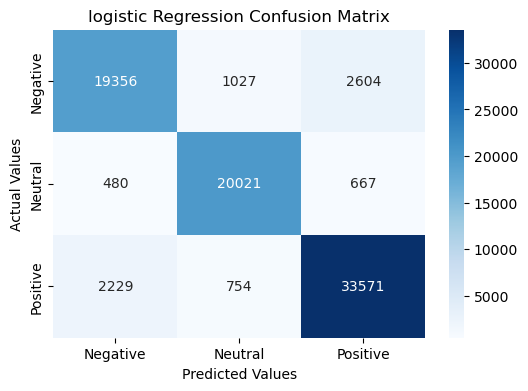

In [73]:
# Creating confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Neutral', 'Positive'], 
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('logistic Regression Confusion Matrix')
plt.show()

### Random Forest Classifier
Random Forest is great because it handles high-dimensional data well and is robust to overfitting.

<div class="alert-info">
Model Two 
</div>

#### Initialize and train the model

In [74]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

`n_estimators=100:` the number of decision trees 
`random_state=42:` ensures reproducibility of results.`

#### Predict

In [75]:
y_pred_rf = rf_model.predict(X_test_tfidf)

### `Evaluating RANDOM FOREST CLASSIFIER` 

In [76]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)

Accuracy: 0.8769158334262598


<div class="alert-success">
Accuracy of 87.69% — and the model is clearly performing well across all three sentiment classes!
</div>

In [77]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


Classification Report:
              precision    recall  f1-score   support

          -1       0.85      0.77      0.81     22987
           0       0.92      0.93      0.93     21168
           1       0.86      0.91      0.89     36554

    accuracy                           0.88     80709
   macro avg       0.88      0.87      0.88     80709
weighted avg       0.88      0.88      0.88     80709



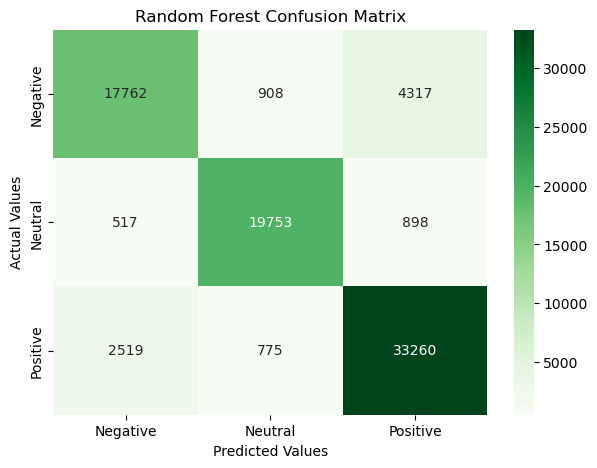

In [78]:
# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(7,5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Random Forest Confusion Matrix')
plt.show()

### Support Vector Machine (SVM)
Support Vector Machine (SVM) model — it’s often very strong for text classification, especially with high-dimensional data like TF-IDF vectors.

<div class="alert-info">
Model Three 
</div>

#### Initialize and train the model##

In [79]:
svm_model = LinearSVC(max_iter=1000)
svm_model.fit(X_train_tfidf, y_train)

LinearSVC()

#### Predict

In [80]:
y_pred_svm = svm_model.predict(X_test_tfidf)

### `Evaluating RANDOM FOREST CLASSIFIER` 

In [81]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy of Support Vector Machine:", accuracy_svm)

Accuracy of Support Vector Machine: 0.9079037034283661


<div class="alert-success">
Accuracy of 90.79% — and the model is clearly performing well across all three sentiment classes!
</div>

In [82]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))


Classification Report:
              precision    recall  f1-score   support

          -1       0.88      0.85      0.87     22987
           0       0.93      0.95      0.94     21168
           1       0.91      0.92      0.92     36554

    accuracy                           0.91     80709
   macro avg       0.91      0.91      0.91     80709
weighted avg       0.91      0.91      0.91     80709



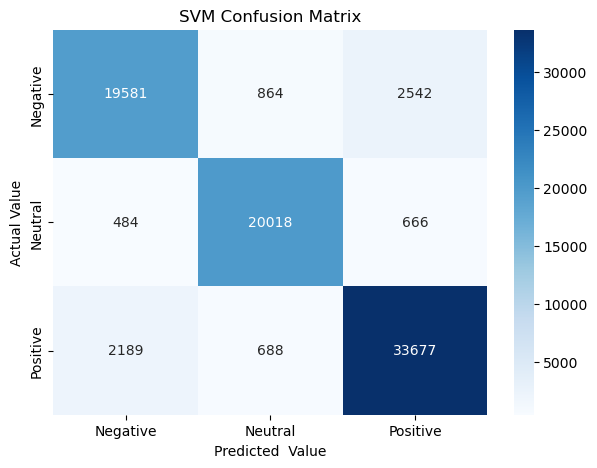

In [83]:
# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(7,5))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted  Value')
plt.ylabel('Actual Value')
plt.title('SVM Confusion Matrix')
plt.show()

### Multinomial Naive Bayes
Multinomial Naive Bayes, which is best for discrete features like TF-IDF.

<div class="alert-info">
Model Four 
</div>

In [84]:
# Initialize and train the model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [85]:
# Predict
y_pred_nb = nb_model.predict(X_test_tfidf)

In [86]:
# Evaluation
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Accuracy:", accuracy_nb)

Accuracy: 0.7388023640486191


<div class="alert-success">
Accuracy of 73.88% — and the model is clearly performing well across all three sentiment classes!
</div>

In [87]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb))


Classification Report:
              precision    recall  f1-score   support

          -1       0.80      0.69      0.74     22987
           0       0.83      0.51      0.63     21168
           1       0.69      0.90      0.78     36554

    accuracy                           0.74     80709
   macro avg       0.77      0.70      0.72     80709
weighted avg       0.76      0.74      0.73     80709



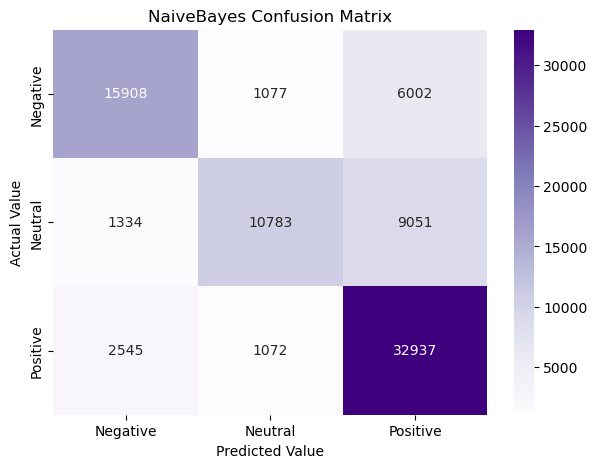

In [88]:
# Confusion Matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(7,5))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('NaiveBayes Confusion Matrix')
plt.show()

### K-Nearest Neighbors (KNN)
KNN is a simple and intuitive algorithm that classifies a sample based on the majority label among its k nearest neighbors in the feature space. It can be a bit slower on large datasets, but it’s good to test for comparison.

<div class="alert-info">
Model Four 
</div>

In [89]:
# Initialize KNN with k=5 (you can tweak this)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_tfidf, y_train)

KNeighborsClassifier()

In [90]:
# Predict
y_pred_knn = knn_model.predict(X_test_tfidf)

In [91]:
# Evaluate
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy_knn)

Accuracy: 0.4619806960809823


<div class="alert-success">
Accuracy of .% — and the model is clearly performing well across all three sentiment classes!
</div>

In [92]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))


Classification Report:
              precision    recall  f1-score   support

          -1       0.79      0.25      0.38     22987
           0       0.33      0.95      0.49     21168
           1       0.89      0.31      0.46     36554

    accuracy                           0.46     80709
   macro avg       0.67      0.50      0.45     80709
weighted avg       0.71      0.46      0.45     80709



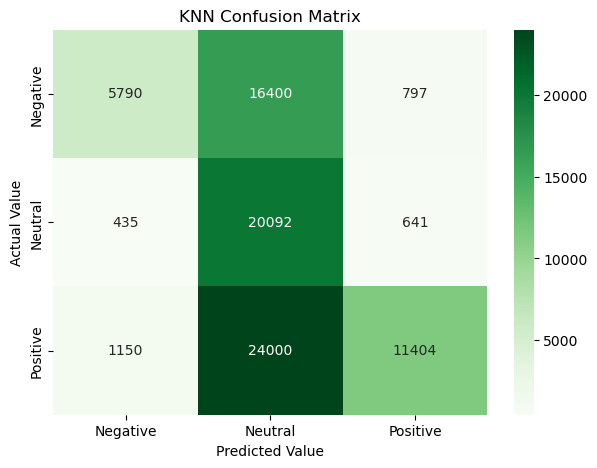

In [93]:
# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(7,5))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('KNN Confusion Matrix')
plt.show()

# Choosing the Best Model
Picking the model with the best performance based on:

- Accuracy
- F1-score

### Model Performance Comparison

| Model                        | Accuracy  | F1-Score  |
|------------------------------|-----------|-----------|
| **Logistic Regression**       | 90.38%    | 0.90      |
| **Random Forest Classifier**  | 87.69%    | 0.88      |
| **Support Vector Machine**    | 90.79%    | 0.91      |
| **Multinomial Naive Bayes**  | 73.88%    | 0.73      |
| **K-Nearest Neighbors (KNN)** | 46.20%    | 0.45      |

---

### Key Insights:
- **Best Model**: **Support Vector Machine (SVM)** with the highest accuracy (90.79%) and F1-score (0.91).
- **Worst Model**: **K-Nearest Neighbors (KNN)** with the lowest accuracy (46.20%) and F1-score (0.45).

# Saving Model and Vectorizer

In [98]:
# Creating 'model' directory if it doesn't exist
os.makedirs('model', exist_ok=True)

In [99]:
# Saving the best model (SVM in your case)
joblib.dump(svm_model, 'model/sentiment_model.pkl')

['model/sentiment_model.pkl']

In [102]:
%whos

Variable                     Type                          Data/Info
--------------------------------------------------------------------
Axes3D                       type                          <class 'mpl_toolkits.mplot3d.axes3d.Axes3D'>
KNeighborsClassifier         ABCMeta                       <class 'sklearn.neighbors<...>on.KNeighborsClassifier'>
LinearSVC                    type                          <class 'sklearn.svm._classes.LinearSVC'>
LogisticRegression           type                          <class 'sklearn.linear_mo<...>stic.LogisticRegression'>
MultinomialNB                ABCMeta                       <class 'sklearn.naive_bayes.MultinomialNB'>
PCA                          ABCMeta                       <class 'sklearn.decomposition._pca.PCA'>
RandomForestClassifier       ABCMeta                       <class 'sklearn.ensemble.<...>.RandomForestClassifier'>
SentimentIntensityAnalyzer   type                          <class 'nltk.sentiment.va<...>timentIntensityAnalyz

In [103]:
# Saving the vectorizer
joblib.dump(tfidf, 'model/tfidf_vectorizer.pkl')

['model/tfidf_vectorizer.pkl']

In [105]:
loaded_model = joblib.load('model/sentiment_model.pkl')

In [106]:
loaded_vectorizer = joblib.load('model/tfidf_vectorizer.pkl')

In [108]:
# Example tweet(s)
new_tweets = ["I really support this candidate!", "This government is a complete disaster."]

# Clean the tweets (using your existing function)
new_cleaned_tweets = [clean_tweet(tweet) for tweet in new_tweets]

# Transform using the saved TF-IDF vectorizer
new_tfidf = loaded_vectorizer.transform(new_cleaned_tweets)

# Predict using the loaded model
preds = loaded_model.predict(new_tfidf)

print(preds)

[ 1 -1]


In [109]:
data.to_csv('final_labeled_tweets.csv', index=False)

# Group Sentiment by Candidate
With our data structured like this — where each tweet is already labeled with: sentiment_label (positive, negative, neutral) and binary indicators for candidate mentions (like contains_obi, contains_atiku, contains_tinubu, etc.), we can easily group sentiment by candidate to analyze who has the highest positive/negative/neutral engagements. 

Now we can make statements like:
"According to our model, 68% of tweets mentioning XXXXX were positive, compared to 49% for ZZZZZZ and 44% for YYYYY."

In [114]:
whos DataFrame

Variable   Type         Data/Info
---------------------------------
data       DataFrame           Language  Number o<...>403543 rows x 22 columns]


In [115]:
# Making a copy to work on
df = data.copy()

# List of candidates' columns
candidates = {
    "Obi": "contains_obi",
    "Atiku": "contains_atiku",
    "Tinubu": "contains_tinubu",
    "Kwankwaso": "contains_kwankwaso"
}

# Initialize an empty list to store results
results = []

for candidate, column in candidates.items():
    # Filter rows where the candidate was mentioned
    candidate_tweets = df[df[column] == 1]

    # Countiing sentiment labels
    positive = (candidate_tweets["sentiment_label"] == "positive").sum()
    negative = (candidate_tweets["sentiment_label"] == "negative").sum()
    neutral = (candidate_tweets["sentiment_label"] == "neutral").sum()
    total = positive + negative + neutral

    # Calculating percentages
    if total > 0:
        pos_pct = (positive / total) * 100
        neg_pct = (negative / total) * 100
        neu_pct = (neutral / total) * 100
    else:
        pos_pct = neg_pct = neu_pct = 0

    results.append({
        "Candidate": candidate,
        "Total Tweets": total,
        "Positive": positive,
        "Negative": negative,
        "Neutral": neutral,
        "Positive (%)": round(pos_pct, 2),
        "Negative (%)": round(neg_pct, 2),
        "Neutral (%)": round(neu_pct, 2)
    })

# Converting to DataFrame
sentiment_summary = pd.DataFrame(results)

# Display
print(sentiment_summary)

   Candidate  Total Tweets  Positive  Negative  Neutral  Positive (%)  \
0        Obi         45424     23656     12978     8790         52.08   
1      Atiku          5213      2812      1383     1018         53.94   
2     Tinubu         12991      6115      4313     2563         47.07   
3  Kwankwaso           605       341       126      138         56.36   

   Negative (%)  Neutral (%)  
0         28.57        19.35  
1         26.53        19.53  
2         33.20        19.73  
3         20.83        22.81  


### Visualizing Group Sentiment by Candidate

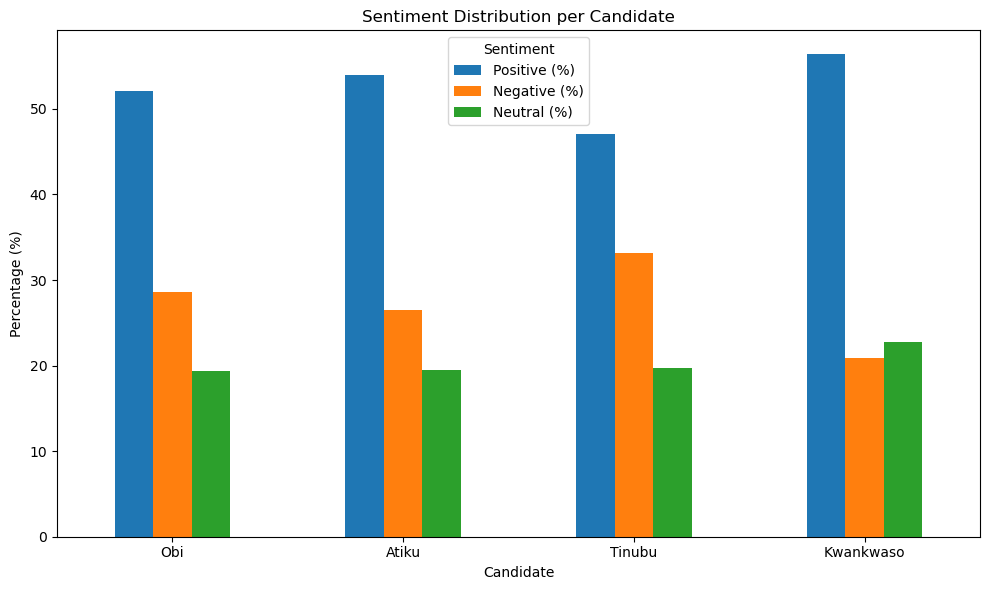

In [117]:
# Plot without setting a style
fig, ax = plt.subplots(figsize=(10, 6))
sentiment_summary.set_index("Candidate")[["Positive (%)","Negative (%)","Neutral (%)"]].plot(
    kind='bar', ax=ax
)
ax.set_title("Sentiment Distribution per Candidate")
ax.set_ylabel("Percentage (%)")
ax.set_xlabel("Candidate")
ax.legend(title="Sentiment")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()